In [ ]:
# 파일 복사
!rm sample_data/jena_climate_2009_2016.csv
!cp drive/MyDrive/Colab\ Notebooks/data-files/jena_climate_2009_2016.csv sample_data/

In [ ]:
# 파일 복사 + 압축 해제
!rm -f sample_data/jena_climate_2009_2016.zip
!rm -f sample_data/jena_climate_2009_2016.csv
!cp drive/MyDrive/Colab\ Notebooks/data-files/jena_climate_2009_2016.zip sample_data
!unzip sample_data/jena_climate_2009_2016.zip -d sample_data
!rm -f sample_data/jena_climate_2009_2016.zip

Archive:  sample_data/jena_climate_2009_2016.zip
  inflating: sample_data/jena_climate_2009_2016.csv  


In [ ]:
# 파일 복사 + 압축 해제
%%bash

rm -f sample_data/jena_climate_2009_2016.zip
rm -f sample_data/jena_climate_2009_2016.csv
cp drive/MyDrive/Colab\ Notebooks/data-files/jena_climate_2009_2016.zip sample_data
unzip sample_data/jena_climate_2009_2016.zip -d sample_data
rm -f sample_data/jena_climate_2009_2016.zip

Archive:  sample_data/jena_climate_2009_2016.zip
  inflating: sample_data/jena_climate_2009_2016.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 데이터 준비
jena_climate = pd.read_csv('sample_data/jena_climate_2009_2016.csv')

In [ ]:
jena_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [ ]:
jena_climate.iloc[142:146, :]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
142,01.01.2009 23:50:00,999.67,-4.58,268.61,-5.62,92.4,4.34,4.01,0.33,2.50,4.02,1294.65,0.69,1.25,213.9
143,02.01.2009 00:00:00,999.59,-4.54,268.65,-5.46,93.2,4.36,4.06,0.30,2.53,4.06,1294.33,0.41,0.88,155.0
144,02.01.2009 00:10:00,999.55,-4.60,268.60,-5.52,93.2,4.34,4.04,0.29,2.52,4.04,1294.58,0.85,1.38,151.2
145,02.01.2009 00:20:00,999.56,-4.67,268.53,-5.52,93.7,4.32,4.04,0.27,2.52,4.05,1294.91,0.83,1.50,148.8


In [ ]:
# features = jena_climate.drop(['Date Time', 'T (degC)'], axis=1)
features = jena_climate.drop(jena_climate.columns[[0, 2]], axis=1)
# temperature = jena_climate['T (degC)']
temperature = jena_climate[jena_climate.columns[2]]

In [ ]:
features.shape, temperature.shape

((420551, 13), (420551,))

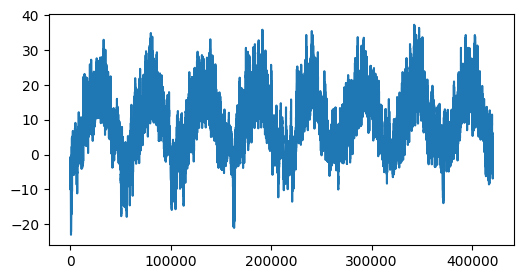

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(range(len(temperature)), temperature)
plt.show()

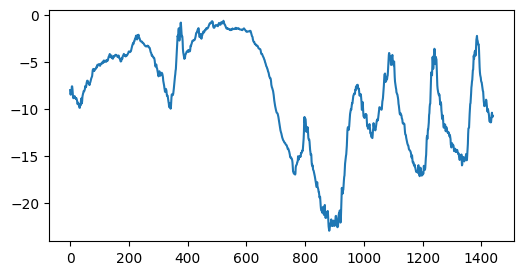

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(range(6*24*10), temperature[:6*24*10])
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow.keras as tf_keras

In [ ]:
model1 = tf_keras.Sequential([
    tf_keras.layers.Input(shape=(13, )),
    tf_keras.layers.Dense(units=128, activation='relu'),
    tf_keras.layers.Dense(units=64, activation='relu'),
    tf_keras.layers.Dense(units=1) # 회귀 모델의 출력층은 units=1, activation=None
])

In [ ]:
model1.compile(optimizer="adam",
               loss="mse",
               metrics=['mae'])

In [ ]:
# 당일 데이터로 당일 기온 예측
# history1 = model1.fit(features.values[::144], temperature.values[::144],
#                       batch_size=32, epochs=10,
#                       validation_split=0.2)

# 당일 데이터로 다음날 기온 예측
history1 = model1.fit(features.values[:-144:144], temperature.values[144::144],
                      batch_size=32, epochs=10,
                      validation_split=0.2)

Epoch 1/10
73/73 [==============================] - 1s 5ms/step - loss: 2081.4885 - mae: 25.1441 - val_loss: 2238.0515 - val_mae: 7.9251
Epoch 2/10
73/73 [==============================] - 0s 3ms/step - loss: 42.4917 - mae: 5.2554 - val_loss: 2216.9443 - val_mae: 7.4754
Epoch 3/10
73/73 [==============================] - 0s 2ms/step - loss: 33.5594 - mae: 4.6916 - val_loss: 2177.1191 - val_mae: 7.0524
Epoch 4/10
73/73 [==============================] - 0s 2ms/step - loss: 25.3032 - mae: 4.0512 - val_loss: 2052.1992 - val_mae: 6.1296
Epoch 5/10
73/73 [==============================] - 0s 2ms/step - loss: 19.1082 - mae: 3.4838 - val_loss: 1916.0923 - val_mae: 5.5593
Epoch 6/10
73/73 [==============================] - 0s 3ms/step - loss: 14.9304 - mae: 3.0489 - val_loss: 1755.1471 - val_mae: 4.8072
Epoch 7/10
73/73 [==============================] - 0s 3ms/step - loss: 12.6893 - mae: 2.8293 - val_loss: 1560.9612 - val_mae: 4.6505
Epoch 8/10
73/73 [==============================] - 0s 2ms/

In [ ]:
# 1시간 단위의 이전 10일의 데이터를 사용해서 다음날 기온 예측

In [ ]:
jena_climate_per_hour = jena_climate.iloc[::6, :]

jena_climate_per_hour.iloc[:240:240, :].head()
# jena_climate_per_hour.iloc[1:241, :]
# jena_climate_per_hour.iloc[2:242, :]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.4,-8.9,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3


In [ ]:
days = 10   # 10일
stride = 6  # 한 시간 단위
delay = (days + 0) * stride * 24 # 11일치 데이터

In [ ]:
# 훈련, 검증, 테스트 데이터 범위
print( features.shape[0] * 0.8 ) # 훈련세트 + 검증세트 vs 테스트세트 경계
print( features.shape[0] * 0.8 * 0.8 ) # 훈련세트 vs 검증세트 경계
# train : 0 ~ 270000
# validation : 270000 ~ 330000
# test : 330000 ~

336440.80000000005
269152.6400000001


In [ ]:
train_dataset = tf_keras.utils.timeseries_dataset_from_array(
    data=features[:-delay],
    targets=temperature[delay:],
    sequence_length=24 * days,    # 한 번에 24  * 10개 뽑기 ( 10일 단위 )
    sampling_rate=stride,         # 6개 마다 한 개씩 뽑기 ( 1시간 단위 )
    shuffle=True,
    batch_size=32,
    start_index=0,
    end_index=270000
)
validation_dataset = tf_keras.utils.timeseries_dataset_from_array(
    data=features[:-delay],
    targets=temperature[delay:],
    sequence_length=24 * days,    # 한 번에 24  * 10개 뽑기 ( 10일 단위 )
    sampling_rate=stride,         # 6개 마다 한 개씩 뽑기 ( 1시간 단위 )
    shuffle=True,
    batch_size=32,
    start_index=270000,
    end_index=330000
)
test_dataset = tf_keras.utils.timeseries_dataset_from_array(
    data=features[:-delay],
    targets=temperature[delay:],
    sequence_length=24 * days,    # 한 번에 24  * 10개 뽑기 ( 10일 단위 )
    sampling_rate=stride,         # 6개 마다 한 개씩 뽑기 ( 1시간 단위 )
    shuffle=True,
    batch_size=32,
    start_index=330000
)

In [ ]:
print( type(test_dataset) )
for X, y in test_dataset:
  print(X.shape, y.shape)
  break

<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
(32, 240, 13) (32,)


In [ ]:
model2 = tf_keras.models.Sequential([
    tf_keras.layers.Input(shape=(240, 13)),
    tf_keras.layers.Flatten(),
    # tf_keras.layers.Dense(units=128, activation='relu'),
    # tf_keras.layers.Dense(units=64, activation='relu'),
    tf_keras.layers.Dense(units=1)
])
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3120)              0         
                                                                 
 dense_18 (Dense)            (None, 1)                 3121      
                                                                 
Total params: 3121 (12.19 KB)
Trainable params: 3121 (12.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.compile(optimizer="adam",
               loss="mse",
               metrics=["mae"])

In [ ]:
history = model2.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
8393/8393 [==============================] - 113s 13ms/step - loss: 416.2007 - mae: 5.5613 - val_loss: 19.7766 - val_mae: 3.4839
Epoch 2/10
8393/8393 [==============================] - 108s 13ms/step - loss: 25.4009 - mae: 2.7225 - val_loss: 60.1541 - val_mae: 6.4544
Epoch 3/10
8393/8393 [==============================] - 124s 15ms/step - loss: 21.5707 - mae: 3.3260 - val_loss: 4.8027 - val_mae: 1.7063
Epoch 4/10
8393/8393 [==============================] - 116s 14ms/step - loss: 5.0088 - mae: 1.7249 - val_loss: 9.4277 - val_mae: 2.7213
Epoch 5/10
8393/8393 [==============================] - 118s 14ms/step - loss: 5.0991 - mae: 1.6877 - val_loss: 2.2064 - val_mae: 1.1331
Epoch 6/10
8393/8393 [==============================] - 115s 14ms/step - loss: 5.7196 - mae: 1.6855 - val_loss: 8.6409 - val_mae: 2.4443
Epoch 7/10
8393/8393 [==============================] - 122s 15ms/step - loss: 5.5284 - mae: 1.6519 - val_loss: 2.0608 - val_mae: 1.0910
Epoch 8/10
8393/8393 [=============

In [ ]:
history = model2.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
8393/8393 [==============================] - 67s 8ms/step - loss: 567.7574 - mae: 16.1361 - val_loss: 801.4894 - val_mae: 28.0567
Epoch 2/10
8393/8393 [==============================] - 80s 10ms/step - loss: 331.9514 - mae: 14.4217 - val_loss: 84.8849 - val_mae: 8.7557
Epoch 3/10
8393/8393 [==============================] - 77s 9ms/step - loss: 333.6013 - mae: 14.0853 - val_loss: 10.4596 - val_mae: 2.5921
Epoch 4/10
8393/8393 [==============================] - 69s 8ms/step - loss: 329.7928 - mae: 14.4307 - val_loss: 485.2404 - val_mae: 21.8633
Epoch 5/10
8393/8393 [==============================] - 67s 8ms/step - loss: 332.8054 - mae: 14.3399 - val_loss: 82.7100 - val_mae: 8.6757
Epoch 6/10
8393/8393 [==============================] - 70s 8ms/step - loss: 327.7992 - mae: 14.2405 - val_loss: 9.2247 - val_mae: 2.4115
Epoch 7/10
8393/8393 [==============================] - 67s 8ms/step - loss: 328.8720 - mae: 14.1060 - val_loss: 1749.4775 - val_mae: 41.6879
Epoch 8/10
8393/8393

In [ ]:
# 순환 신경망 모델

input = tf_keras.layers.Input(shape=(240, 13)) # 입력
x = tf_keras.layers.SimpleRNN(units=16)(input)
output = tf_keras.layers.Dense(units=1)(x) # 출력

model3 = tf_keras.models.Model(input, output)

model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 240, 13)]         0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                480       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 497 (1.94 KB)
Trainable params: 497 (1.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model3.compile(optimizer="adam",
               loss="mse",
               metrics=['mae'])

In [ ]:
history3 = model3.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
8393/8393 [==============================] - 392s 47ms/step - loss: 43.7646 - mae: 4.9504 - val_loss: 17.4159 - val_mae: 3.2768
Epoch 2/10
8393/8393 [==============================] - 381s 45ms/step - loss: 23.8230 - mae: 3.8923 - val_loss: 19.3241 - val_mae: 3.5045
Epoch 3/10
8393/8393 [==============================] - 397s 47ms/step - loss: 22.8585 - mae: 3.8145 - val_loss: 16.5158 - val_mae: 3.2318
Epoch 4/10
8393/8393 [==============================] - 381s 45ms/step - loss: 10.8534 - mae: 2.3240 - val_loss: 5.9220 - val_mae: 1.9182
Epoch 5/10
8393/8393 [==============================] - 398s 47ms/step - loss: 6.1231 - mae: 1.8038 - val_loss: 3.8574 - val_mae: 1.4305
Epoch 6/10
8393/8393 [==============================] - 386s 46ms/step - loss: 5.7217 - mae: 1.7534 - val_loss: 4.2489 - val_mae: 1.5125
Epoch 7/10
8393/8393 [==============================] - 389s 46ms/step - loss: 5.5524 - mae: 1.7311 - val_loss: 4.6689 - val_mae: 1.6049
Epoch 8/10
8393/8393 [============

In [ ]:
# 순환 신경망 모델 2

input = tf_keras.layers.Input(shape=(240, 13)) # 입력
x = tf_keras.layers.LSTM(units=16)(input)
output = tf_keras.layers.Dense(units=1)(x) # 출력

model4 = tf_keras.models.Model(input, output)

model4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 240, 13)]         0         
                                                                 
 lstm (LSTM)                 (None, 16)                1920      
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1937 (7.57 KB)
Trainable params: 1937 (7.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model4.compile(optimizer="adam",
               loss="mse",
               metrics=['mae'])

In [ ]:
history4 = model4.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
8393/8393 [==============================] - 765s 91ms/step - loss: 63.6999 - mae: 6.0378 - val_loss: 24.1563 - val_mae: 3.6362
Epoch 2/10
8393/8393 [==============================] - 691s 82ms/step - loss: 26.4100 - mae: 3.5589 - val_loss: 9.4222 - val_mae: 2.0341
Epoch 3/10
8393/8393 [==============================] - 691s 82ms/step - loss: 12.6800 - mae: 2.3315 - val_loss: 5.0777 - val_mae: 1.5714
Epoch 4/10
3815/8393 [============>.................] - ETA: 6:02 - loss: 8.2300 - mae: 1.8924

KeyboardInterrupt: 

In [ ]:
# 순환 신경망 모델 3 : 심층 순환 신경망

input = tf_keras.layers.Input(shape=(240, 13)) # 입력
x = tf_keras.layers.LSTM(units=16, return_sequences=True)(input) # return_sequences=True : 각 스텝의 출력을 보존
x = tf_keras.layers.LSTM(units=16, return_sequences=False)(x)
output = tf_keras.layers.Dense(units=1)(x) # 출력

model5 = tf_keras.models.Model(input, output)

model5.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 240, 13)]         0         
                                                                 
 lstm_1 (LSTM)               (None, 240, 16)           1920      
                                                                 
 lstm_2 (LSTM)               (None, 16)                2112      
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4049 (15.82 KB)
Trainable params: 4049 (15.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model5.compile(optimizer="adam",
               loss="mse",
               metrics=['mae'])

In [ ]:
history5 = model5.fit(train_dataset, epochs=10, validation_data=validation_dataset)

In [ ]:
# CNN을 사용해서 순환 신경망 모방 모델 만들기

input = tf_keras.layers.Input(shape=(240, 13))
x = tf_keras.layers.Conv1D(filters=16, kernel_size=24, activation="relu", padding="same")(input)
x = tf_keras.layers.MaxPool1D(pool_size=2)(x)
x = tf_keras.layers.Conv1D(filters=16, kernel_size=12, activation="relu", padding="same")(x)
x = tf_keras.layers.MaxPool1D(pool_size=2)(x)
x = tf_keras.layers.Conv1D(filters=16, kernel_size=6, activation="relu", padding="same")(x)
x = tf_keras.layers.MaxPool1D(pool_size=2)(x)
x = tf_keras.layers.GlobalAvgPool1D()(x)
output = tf_keras.layers.Dense(1)(x)

model6 = tf_keras.models.Model(input, output)

model6.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 240, 13)]         0         
                                                                 
 conv1d_3 (Conv1D)           (None, 240, 16)           5008      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 120, 16)           0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 120, 16)           3088      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 60, 16)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 60, 16)            1552

In [ ]:
model6.compile(optimizer="adam",
               loss="mse",
               metrics=['mae'])

In [ ]:
history6 = model6.fit(train_dataset, epochs=10, validation_data=validation_dataset)